<a href="https://colab.research.google.com/github/Prakriti-dheeraj/Binary-Classification/blob/main/Fashion_MNIST_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

seeding for reproducibility

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

importing the dependencies

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


data curation

In [ ]:
# loading and prepare the fashion MNist dataset
fashion_mnist = datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


processing

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

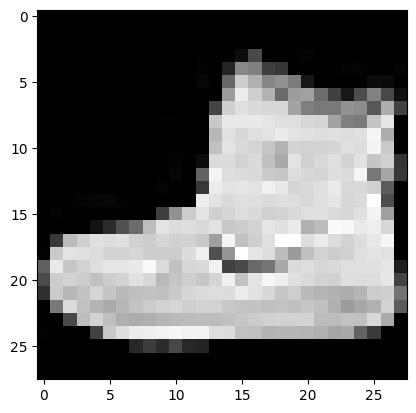

In [ ]:
# display an image from the dataset
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [ ]:
print(train_labels[0])

9


class_name=[t_shirt/top,trouser,pullover,dress,coat,sandle,shiet,sneakers,bag,ankle boots]

In [ ]:
# Normalize pixal values to be between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
# reshape image to specify that it's a single channel (grayscale)
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

CNN

In [ ]:
# build the convolution base
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#add dense layer on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model training

In [ ]:
history=model.fit(train_images,train_labels,epochs=5
                  ,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7455 - loss: 0.7035 - val_accuracy: 0.8680 - val_loss: 0.3669
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8756 - loss: 0.3441 - val_accuracy: 0.8858 - val_loss: 0.3153
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8929 - loss: 0.2882 - val_accuracy: 0.8922 - val_loss: 0.2967
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9068 - loss: 0.2525 - val_accuracy: 0.8946 - val_loss: 0.2967
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9175 - loss: 0.2257 - val_accuracy: 0.8942 - val_loss: 0.3026


In [ ]:
#evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8942 - loss: 0.3026
0.8942000269889832


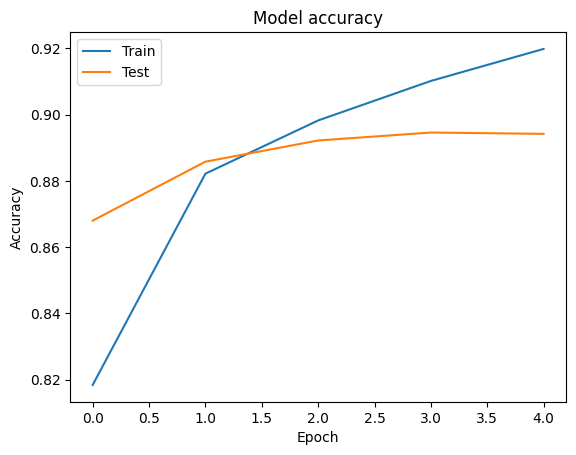

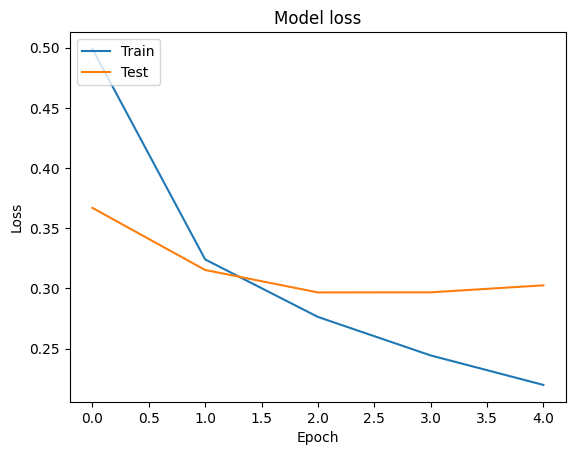

In [ ]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('trained_fashion_mnist_model.h5')